Trainable Parameters

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


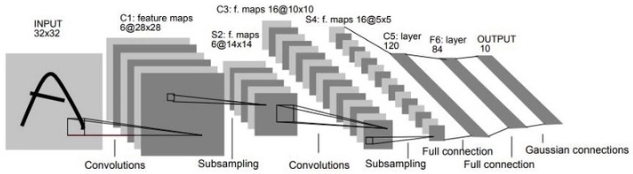

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
lenet5 = LeNet5()
alexnet = models.alexnet(pretrained=False)
vgg16 = models.vgg16(pretrained=False)
resnet50 = models.resnet50(pretrained=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
print("LeNet-5:", count_trainable_parameters(lenet5))

LeNet-5: 61706


In [ ]:
print("AlexNet:", count_trainable_parameters(alexnet))

AlexNet: 61100840


In [ ]:
print("VGG16:", count_trainable_parameters(vgg16))

VGG16: 138357544


In [ ]:
print("ResNet-50:", count_trainable_parameters(resnet50))

ResNet-50: 25557032


To print layer wise paramters

In [ ]:
def print_layer_parameters(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"Layer: {name} | Size: {param.size()} | Parameters: {param.numel()}")

In [ ]:
print_layer_parameters(lenet5)

Layer: conv1.weight | Size: torch.Size([6, 1, 5, 5]) | Parameters: 150
Layer: conv1.bias | Size: torch.Size([6]) | Parameters: 6
Layer: conv2.weight | Size: torch.Size([16, 6, 5, 5]) | Parameters: 2400
Layer: conv2.bias | Size: torch.Size([16]) | Parameters: 16
Layer: fc1.weight | Size: torch.Size([120, 400]) | Parameters: 48000
Layer: fc1.bias | Size: torch.Size([120]) | Parameters: 120
Layer: fc2.weight | Size: torch.Size([84, 120]) | Parameters: 10080
Layer: fc2.bias | Size: torch.Size([84]) | Parameters: 84
Layer: fc3.weight | Size: torch.Size([10, 84]) | Parameters: 840
Layer: fc3.bias | Size: torch.Size([10]) | Parameters: 10


In [ ]:
print_layer_parameters(alexnet)

Layer: features.0.weight | Size: torch.Size([64, 3, 11, 11]) | Parameters: 23232
Layer: features.0.bias | Size: torch.Size([64]) | Parameters: 64
Layer: features.3.weight | Size: torch.Size([192, 64, 5, 5]) | Parameters: 307200
Layer: features.3.bias | Size: torch.Size([192]) | Parameters: 192
Layer: features.6.weight | Size: torch.Size([384, 192, 3, 3]) | Parameters: 663552
Layer: features.6.bias | Size: torch.Size([384]) | Parameters: 384
Layer: features.8.weight | Size: torch.Size([256, 384, 3, 3]) | Parameters: 884736
Layer: features.8.bias | Size: torch.Size([256]) | Parameters: 256
Layer: features.10.weight | Size: torch.Size([256, 256, 3, 3]) | Parameters: 589824
Layer: features.10.bias | Size: torch.Size([256]) | Parameters: 256
Layer: classifier.1.weight | Size: torch.Size([4096, 9216]) | Parameters: 37748736
Layer: classifier.1.bias | Size: torch.Size([4096]) | Parameters: 4096
Layer: classifier.4.weight | Size: torch.Size([4096, 4096]) | Parameters: 16777216
Layer: classifie